# NEXT STEPS:
### Finish my individual story
    ### create individual query
    ### write about that
    ### write some other connecting stuff








# Salary, Gameplay, and Win Percentage: A Case Study of Three Teams
### Ward Anderson, Ben Brown, Jeff Stevens
### Dr. Kretchmar
### CS 181
### 10/22/18

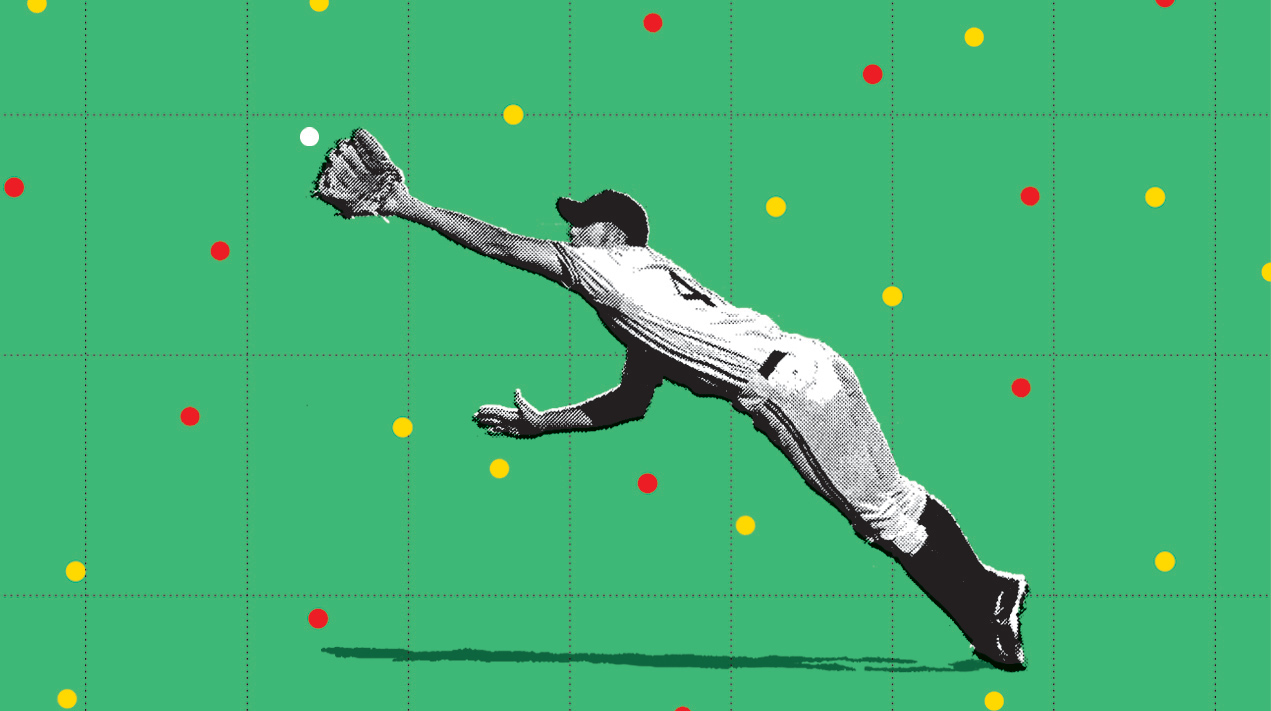

(Munday)

Baseball, endearingly called "America's favorite pastime", has been a popular sport since the 19th century. Throughout its lifespan, it has undergone a myriad of rule changes. From the unbanning of overhand pitching to the addition of designated hitters in the American league in 1972 ("Baseball Rule Change Timeline"), the meta has shifted the viable strategies and the important aspects of the game for teams improve upon. These specific game aspects have been extensively examined in the statistics of baseball, and they have fortunately been catalogued since the early 1900's. The Sean Lahman baseball database holds observations for all notable statistics in baseball, which we will examine in the following content.

For those unfamiliar with baseball statistics, a vast amount of game actions are recorded as stats, but some of the more popular stats to display happen to be batting average, earned run average, and fielding percentage, all abbreviated as BA, ERA, and FP respectively. These stats also tend to be associated and deterministic of team success as well.

Batting average is intended to describe the liklihood of a player to make a base hit and is calculated by the number hits a player makes divided by the number of times they step up to the plate to bat. While sabermetricians, analyzers of empirical baseball statistics, have agreed on the fact that it is a good idea to track a statistic for such a purpose, they also have agreed that batting average is, surprisingly, not very deterministic in regard to victories or team success. The reason for this common opinion will be explored later in this paper. Other calculations, such as the slugging percentage, have been created to fix the predictive errors that arose with relying on batting average (Albert).

Earned run average is the number of runs allowed by a pitcher in nine innings and is calculated by the dividing the number of runs scored by the other team by the numbers of innings pitched, multiplied by nine. ERA has been agreed upon to be a decent metric with which to grade the defense of a team. Note well that ERA is more so indicative of the defense of the entire fielding team than it is of just the ability of the pitcher. More calculations exist which isolate the skill of certain positions and indicate specific strengths. A pitcher independent statistic which measures defense well is the strikeout rate, while fielding percentage tends to be more exclusive from the pitcher (Albert).

Fielding percentage shows the percentage of how many fielding plays are done without error. This percentage is determined simply by the number of successful fielding plays (put-outs and assists) divided by the total plays (put-outs, assists, and errors). The ability of specific fielders can also be further isolated by calculating fielder range, but that will not be inspected in this analysis (Albert).

Our analysis of the database began by focusing on a subset of the data, that being each of our favorite teams: the Washington Nationals, the Cincinnati Reds, and the Cleveland Indians. Given that the focus was narrowed, we decided to pit the popular statistics described above of each of our teams against one another. This seemed especially interesting, as the database provided observations that date all the way back to the year 1901.

The code below opens up our tools for data analysis and connects us to the database.

In [1]:
#Import libraries for data handling
import pandas as pd
import sqlalchemy as sa
import matplotlib.pyplot as plt
import json
import numpy as np

#Include inflation data
inflation = pd.read_csv("conversionfactors.csv")

def getCreds(filename,subset,defaults={}):
    '''
    This function helps us connect to a database on hadoop2.  The
    userid password information is stored in a local file encoded
    in json format.  
    Inputs:
        filename is where json encoded userid/password information stored
        subset : dictionary key in json file
        defaults : alternative way to connect to database
    Returns subdictionary based on subset parameter.
    '''
    try:
        with open(filename,'r') as file:
            D = json.load(file)
            file.close()
            if D[subset]:
                return D[subset]
            else:
                return defaults
    except:
        return defaults
     
def db_setup(database):
    template = 'mysql+mysqlconnector://{}:{}@hadoop2.mathsci.denison.edu/{}'
    cstring = template.format(creds['user'],creds['password'],database)
    return cstring

creds = getCreds('creds.json','mysql',defaults = {'user':'steven_j1', 'password':'steven_j1'})

cstring = db_setup("lahman2016")
engine = sa.create_engine(cstring)
connection = engine.connect()

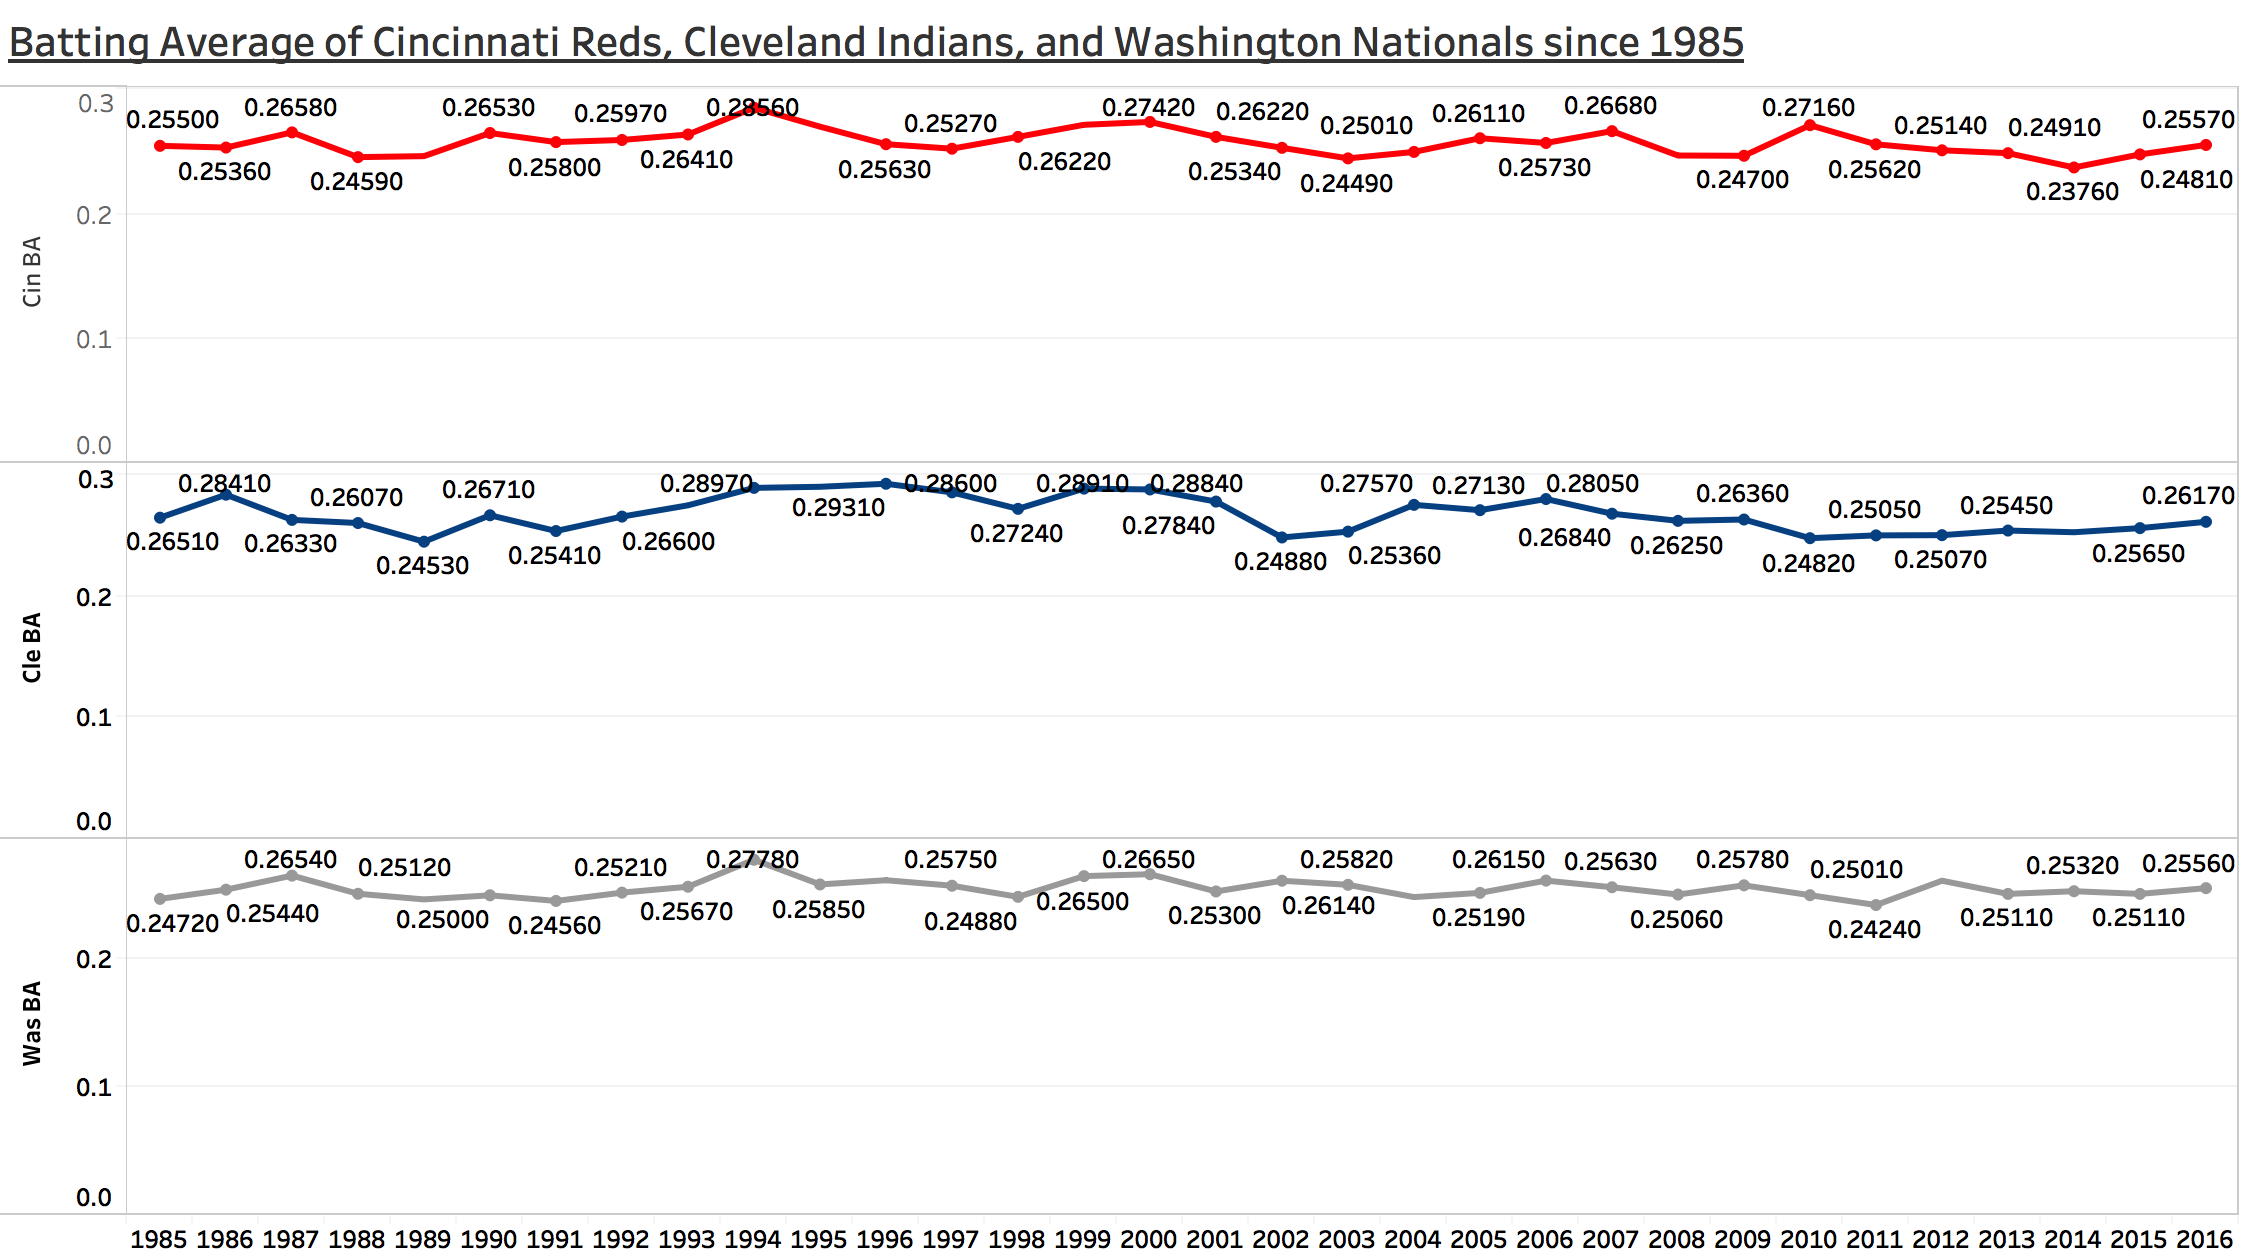

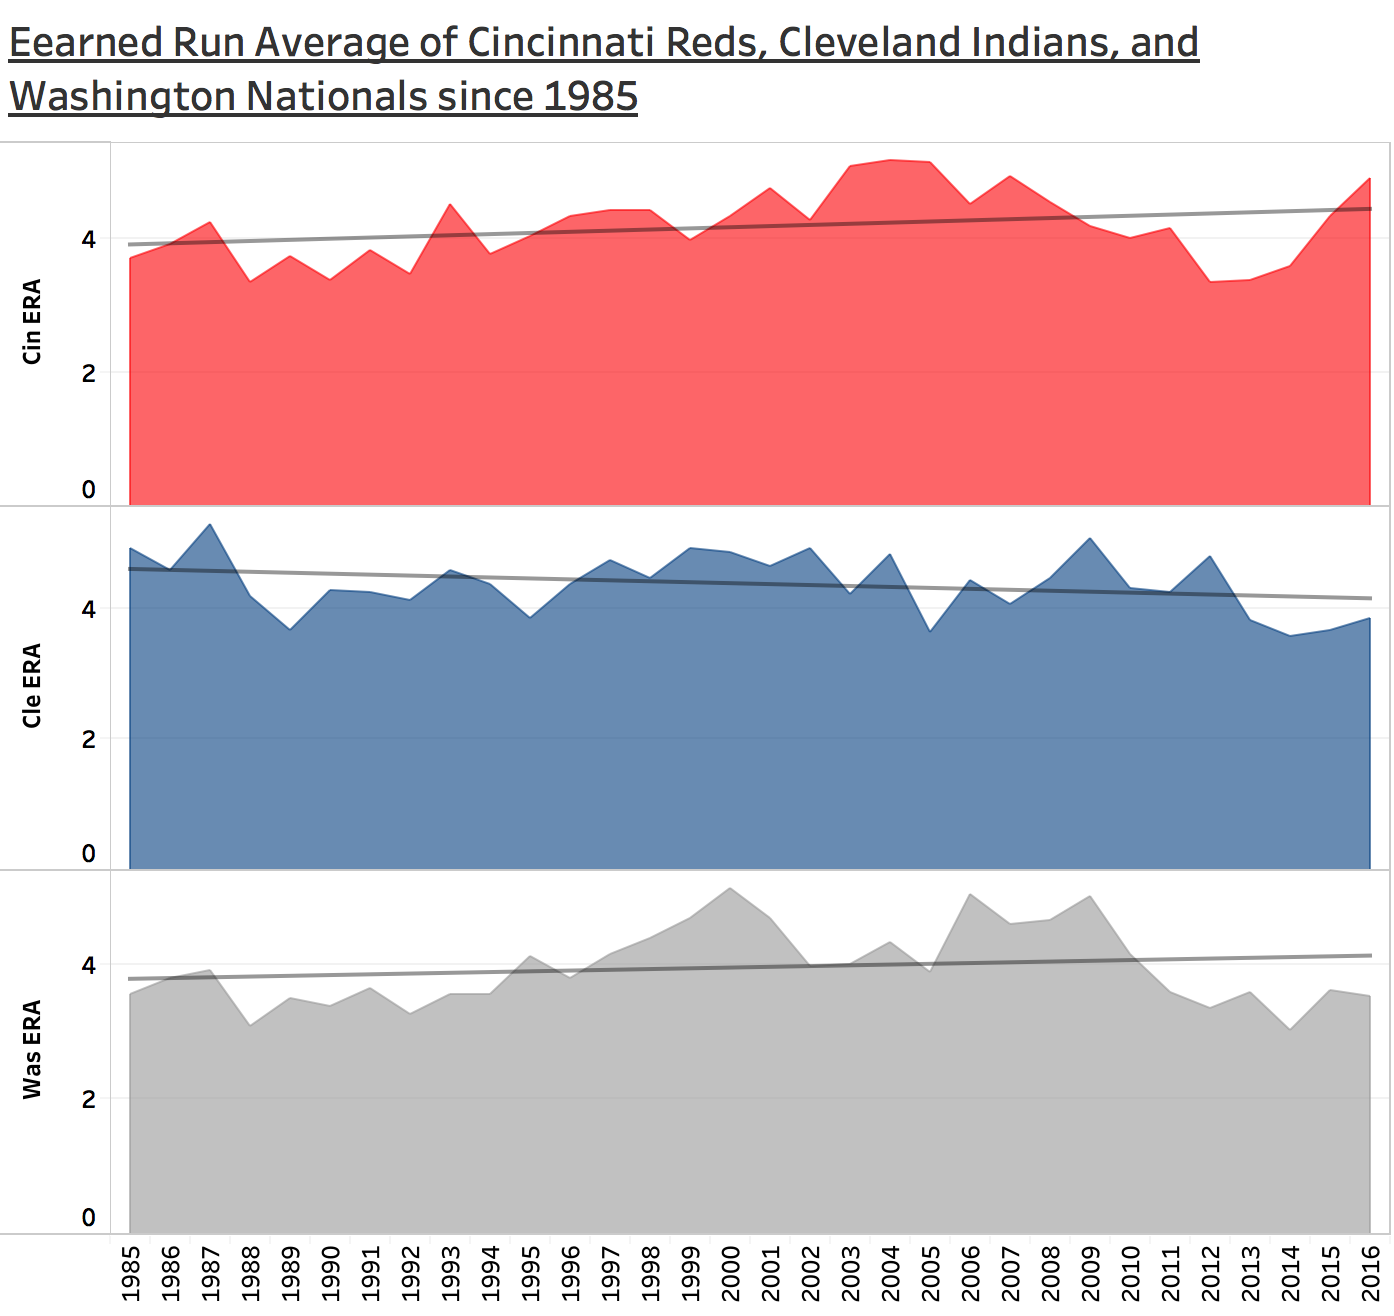

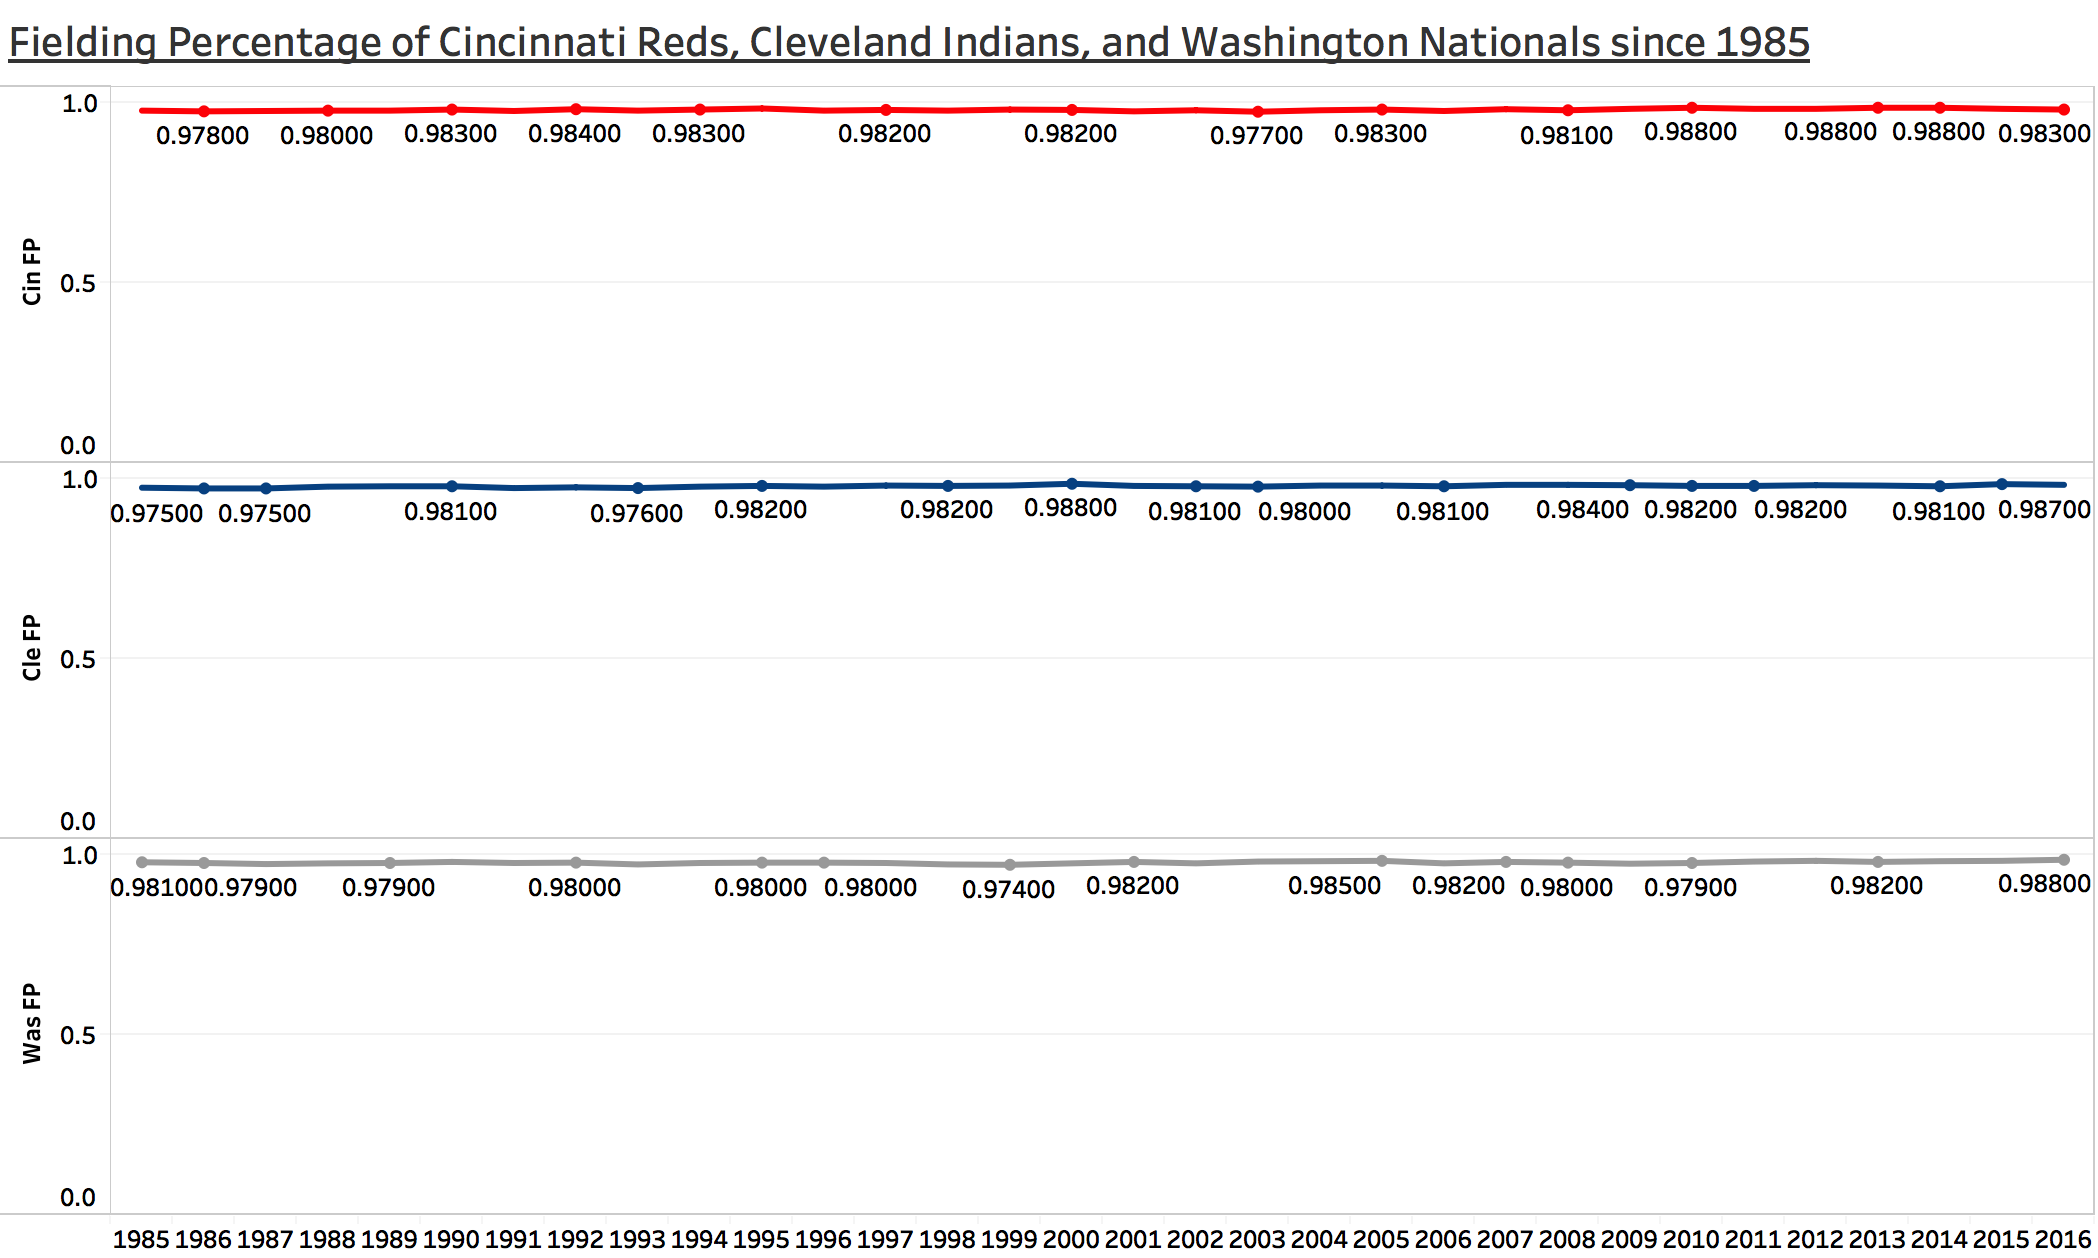

While it can be fun to see whose team reigns supreme, we cannot draw too many meaningful conclusions from these graphs. One of these few conclusions could be to look more closely at each team to determine why these graphs present the information they do, and we will follow through with that conclusion.

## The Cincinnati Reds
Below we have a table of some of the Cincinnati Red's average offense and defense stats since 1882. 

In [2]:
   #-#-#-#-#-#-#-#-#-#-#-#-#-#-#
########## CINCINNATI REDS ##########
     #-#-#-#-#-#-#-#-#-#-#-#-#-#-#

getredstats = '''SELECT t.yearID, t.teamID, t.franchID, t.H, t.AB, t.W, t.L, t.ERA, t.H/t.AB AS BA, 
t.W/(t.W+t.L) AS Winpct, t.FP, (t.H - t.2B - t.3B - t.HR + (t.2B * 2) + (t.3B * 3) + (4 * t.HR))/t.AB AS CinSLGPct,
(t.H + t.BB + t.HBP)/(t.AB + t.BB + t.HBP + t.SF) AS CinOBP
FROM Teams AS t
WHERE t.franchID = "CIN";'''

getredsal = "SELECT yearID, AVG(salary) AS RedsSalary \
FROM Salaries \
WHERE teamID = 'CIN' \
GROUP BY yearID \
ORDER BY yearID;"

#Converting Cincinnati Reds query to DataFrame
tmp = connection.execute(getredstats)
redstats = pd.DataFrame(tmp.fetchall(), columns = tmp.keys())
redstats = redstats.rename(index = str, columns = {'teamID':'CinTeamID', 'franchID':\
                                                     'CinFranchID', 'H': 'CinH', 'AB':'CinAB', 'W':'CinW', 'L':\
                                                     'CinL', 'ERA': 'CinERA', 'BA':'CinBA', 'Winpct':'CinWinpct', \
                                                     'FP': 'CinFP'})

redstats['OPS+'] = redstats['CinSLGPct'].apply(float) + redstats['CinOBP'].apply(float)

print(redstats)

     yearID CinTeamID CinFranchID  CinH  CinAB  CinW  CinL  CinERA   CinBA  \
0      1882       CN2         CIN   795   3007    55    25    1.65  0.2644   
1      1883       CN2         CIN   961   3669    61    37    2.26  0.2619   
2      1884       CN2         CIN  1037   4090    68    41    3.33  0.2535   
3      1885       CN2         CIN  1046   4050    63    49    3.26  0.2583   
4      1886       CN2         CIN  1225   4915    65    73    4.18  0.2492   
5      1887       CN2         CIN  1285   4797    81    54    3.58  0.2679   
6      1888       CN2         CIN  1161   4801    80    54    2.73  0.2418   
7      1889       CN2         CIN  1307   4844    76    63    3.50  0.2698   
8      1890       CIN         CIN  1204   4644    77    55    2.79  0.2593   
9      1891       CIN         CIN  1158   4791    56    81    3.55  0.2417   
10     1892       CIN         CIN  1288   5349    82    68    3.17  0.2408   
11     1893       CIN         CIN  1195   4617    65    63    4.

As stated above, it is necessary to use different metrics than batting average to gage a team's offense. "There's too many things wrong, starting from the fact that there are a lot of variables involved such as not including walks, or the subjective nature of awarding hits and errors," says C. Trent Rosecrans of CBS Sports. As far as any method of analysis in sabermetrics goes, there is no silver bullet. In regards to offense, Rosecrans recommends a stat titled OPS+, a fancy abbreviation for on-base plus slugging percentage, for an accurate measurement of offense. Slugging percentage is calculated similarly to batting average, but has different weighting for singles, doubles, triples, and home runs so that the productivity of the batter is measured. A perfect slugging percentage is 4.000. As for on base percentage, it is merely the number of times a player gets on base out of the amount of times they go up to bat, in any method possible, including walks and errors.

Below we will calculate the OPS+ for the Cincinnati Reds.

In [3]:
#show as a dataframe Reds OBPS

As it was the case for offense stats, there are more than enough stats to choose to measure the defensive capabilities of a team. The baseball writers for CBS Sports did not reach a concensus on which stat might be the most productive for analysis (“What Is the Best Defensive Stat?"). Therefore, we will just simply inspect the earned run average and fielding percentage.

In [4]:
#show as a dataframe Reds FP and ERA

## The Cleveland Indians
In very much the same way as we studied the Reds, we will take a look at the statistics of the Indians.

In [5]:
     #-#-#-#-#-#-#-#-#-#-#-#-#-#-#
########## CLEVELAND INDIANS ##########
     #-#-#-#-#-#-#-#-#-#-#-#-#-#-#

query_main = '''SELECT t.yearID, t.teamID, t.franchID, t.H, t.AB, t.W, t.L, t.ERA, t.H/t.AB AS BA, 
t.W/(t.W+t.L) AS Winpct, t.FP, (t.H - t.2B - t.3B - t.HR + (t.2B * 2) + (t.3B * 3) + (4 * t.HR))/t.AB AS CleSLGPct,
(t.H + t.BB + t.HBP)/(t.AB + t.BB + t.HBP + t.SF) AS CleOBP
FROM Teams AS t
WHERE t.franchID = "CLE";'''

getclesal = "SELECT yearID, AVG(salary) AS CleSalary \
FROM Salaries \
WHERE teamID = 'CLE' \
GROUP BY yearID \
ORDER BY yearID;"

#Converting Cleveland Indians query to DataFrame
result = connection.execute(query_main)
rows = result.fetchall()
CleStats = pd.DataFrame(rows,columns = result.keys())
CleStats = CleStats.rename(index = str, columns = {'teamID':'CleTeamID', 'franchID':\
                                                     'CleFranchID', 'H': 'CleH', 'AB':'CleAB', 'W':'CleW', 'L':\
                                                     'CleL', 'ERA': 'CleERA', 'BA':'CleBA', 'Winpct':'CleWinpct', \
                                                     'FP': 'CleFP'})

CleStats['OPS+'] = CleStats['CleSLGPct'].apply(float) + CleStats['CleOBP'].apply(float)

print("Statistics for The Cleveland Indians Baseball Team since 1901")
print(CleStats)

Statistics for The Cleveland Indians Baseball Team since 1901
     yearID CleTeamID CleFranchID  CleH  CleAB  CleW  CleL  CleERA   CleBA  \
0      1901       CLE         CLE  1311   4833    54    82    4.12  0.2713   
1      1902       CLE         CLE  1401   4840    69    67    3.28  0.2895   
2      1903       CLE         CLE  1265   4773    77    63    2.73  0.2650   
3      1904       CLE         CLE  1340   5152    86    65    2.22  0.2601   
4      1905       CLE         CLE  1318   5166    76    78    2.85  0.2551   
5      1906       CLE         CLE  1516   5426    89    64    2.09  0.2794   
6      1907       CLE         CLE  1221   5068    85    67    2.26  0.2409   
7      1908       CLE         CLE  1221   5108    90    64    2.02  0.2390   
8      1909       CLE         CLE  1216   5048    71    82    2.40  0.2409   
9      1910       CLE         CLE  1316   5385    71    81    2.88  0.2444   
10     1911       CLE         CLE  1501   5321    80    73    3.36  0.2821   
11

For a more visualisable representation of the data, the following graphs are provided.

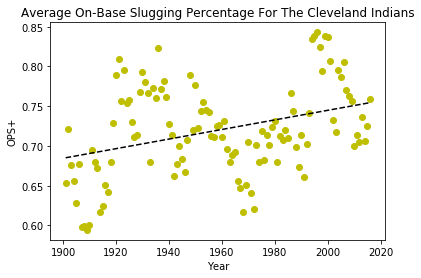

In [6]:
#OPS+ since 1901
CLE_OPS_fit = np.polyfit(CleStats['yearID'], CleStats['OPS+'], 1)
CLE_OPS_fit_fn = np.poly1d(CLE_OPS_fit)

plt.plot(CleStats['yearID'], CleStats['OPS+'], 'yo', CleStats['yearID'], CLE_OPS_fit_fn(CleStats['yearID']), '--k')
plt.title("Average On-Base Slugging Percentage For The Cleveland Indians")
plt.xlabel('Year')
plt.ylabel('OPS+')
plt.show()

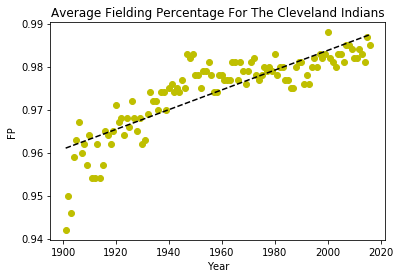

In [7]:
#Fielding Percentage since 1901
CLE_OPS_fit = np.polyfit(CleStats['yearID'], CleStats['CleFP'], 1)
CLE_OPS_fit_fn = np.poly1d(CLE_OPS_fit)

plt.plot(CleStats['yearID'], CleStats['CleFP'], 'yo', CleStats['yearID'], CLE_OPS_fit_fn(CleStats['yearID']), '--k')
plt.title("Average Fielding Percentage For The Cleveland Indians")
plt.xlabel("Year")
plt.ylabel("FP")
plt.show()

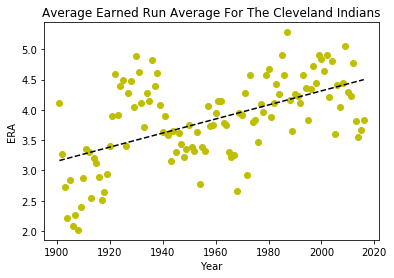

In [8]:
#Earned run average since 1901
CLE_OPS_fit = np.polyfit(CleStats['yearID'], CleStats['CleERA'], 1)
CLE_OPS_fit_fn = np.poly1d(CLE_OPS_fit)

plt.plot(CleStats['yearID'], CleStats['CleERA'], 'yo', CleStats['yearID'], CLE_OPS_fit_fn(CleStats['yearID']), '--k')
plt.title("Average Earned Run Average For The Cleveland Indians")
plt.xlabel("Year")
plt.ylabel("ERA")
plt.show()

Interestingly, it seems that the Indians have gotten better at batting and fielding over the years, despite an increasing trend in ERA. Keep in mind, that a lower ERA is better. 

As for offense, we most wonder why we are seeing a trend like this. Possible explanations for the positive trend on OPS+ could refer to the advent of designated hitters in 1972, an increased focus on offense, or one of many other explanations. Not many other rule changes within the last 100 years would seem to directly increase the attractiveness in focusing on offensiveness, nor would the presence of steroids, as the Indians appear to not have a vast history in steroid use. A possible answer to this question will be explored momentarily.

Concerning defense, it is reasonable to assume that due to the increasing selectivity of the MLB and the exclusivity of the MLB draft accounts for the near perfect average fielding percentage for almost all teams. In fact, the average 2018 Fielding Percentage for all Major League Baseball teams is .989, still almost perfect ("MLB Stats"). So these observations of the Indians are nothing out of the ordinary. 

Moving on to ERA, it is curious why a team's defensive stats like fielding percentage seem to be solid and then ERA begins to lag. Perhaps it would seem reasonable that a weakening ERA is a consequence of the powering up of offense on modern baseball teams. This should not be confounded for the worsening of pitchers or any other defensive skills, but simply a use of ERA in an incorrect context. Note well that ERA is the amount of runs scored against a pitcher in the amount of innings that they pitch.

Turning back to why offensive power may be increasing, to uninitiated sabermetricians such as ourselves, we have little idea of where to begin other than to hunt around for more data which might be effective in explanation when it is juxtaposed against other interesting bits of information. For this comparison, I thought it might be a bit amusing to relate the average weight of a player with slugging percentage. After all, baseball superstar Babe Ruth weighed in at 215 pounds. As America has gotten heavier over the years, maybe our swings have also gotten heavier?

    YearID  Average Player Weight  Average Slugging Percentage
0     1985             184.000000                       0.3852
1     1986             186.483871                       0.4298
2     1987             186.857143                       0.4217
3     1988             192.136364                       0.3866
4     1989             187.185185                       0.3650
5     1990             187.000000                       0.3907
6     1991             192.066667                       0.3501
7     1992             191.571429                       0.3827
8     1993             193.300000                       0.4086
9     1994             195.314286                       0.4838
10    1995             193.428571                       0.4787
11    1996             189.677419                       0.4753
12    1997             199.870968                       0.4669
13    1998             201.060606                       0.4484
14    1999             196.710526                      

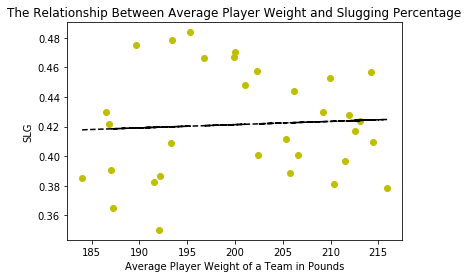

In [14]:
#Average player weight over the years vs Slugging percentage over the years

#query that database
weightQuery = '''
SELECT weight, yearID
FROM Master AS m
INNER JOIN Salaries AS s ON s.playerID = m.playerID
WHERE s.teamID = "CLE"
ORDER BY yearID;
'''

result = connection.execute(weightQuery)
rows = result.fetchall()
CleWeight = pd.DataFrame(rows,columns = result.keys())

#find average weight 
yearCount = 1985 #begin at this year
p = 0
pStart = 0
weightSum = 0
weightList = []

while yearCount < 2017: #we will examine weights from 1985 to 2016
    while (CleWeight.iloc[p,1] == yearCount) and (p < 948):
        weightSum += CleWeight.iloc[p,0]
        p += 1
    weightList.append(weightSum/(p-pStart))
    pStart = p
    weightSum = 0
    yearCount += 1
    
#Construct the dataframe and add in slugging percentage
avgWeightTable = pd.DataFrame()
avgWeightTable["YearID"] = pd.Series(range(1985,2017))
avgWeightTable["Average Player Weight"] = pd.Series(weightList)
avgWeightTable["Average Slugging Percentage"] = pd.Series(pd.Series.tolist(CleStats['CleSLGPct'].iloc[84:116]))

avgWeightTable["Average Player Weight"] = avgWeightTable["Average Player Weight"].apply(float)
avgWeightTable["Average Slugging Percentage"] = avgWeightTable["Average Slugging Percentage"].apply(float)

print(avgWeightTable)

#Now we graph our table
CLE_SLG_fit = np.polyfit(avgWeightTable['Average Player Weight'], avgWeightTable['Average Slugging Percentage'], 1)
CLE_SLG_fit_fn = np.poly1d(CLE_SLG_fit)

plt.plot(avgWeightTable["Average Player Weight"], avgWeightTable["Average Slugging Percentage"], 'yo', avgWeightTable["Average Player Weight"], CLE_SLG_fit_fn(avgWeightTable["Average Player Weight"]), '--k')
plt.title("The Relationship Between Average Player Weight and Slugging Percentage")
plt.xlabel("Average Player Weight of a Team in Pounds")
plt.ylabel("SLG")
plt.show()

The results are curious. First we see a general increase in player weight over time, and then an increase in slugging percentage over time, but the graph points out that the two variables are not undeniably related with eachother. However, the regression line does indeed have a somewhat positive trend to it. The relationship is obviously too small to take seriously and warrant further investigation into the specific issue, but this was a fascinating exploration of the data and a good question to pose.

## The Washington Nationals
Lastly, the Nationals will have their record put under investigation.

In [ ]:
     #-#-#-#-#-#-#-#-#-#-#-#-#-#-#
########## WASHINGTON NATIONALS ##########
     #-#-#-#-#-#-#-#-#-#-#-#-#-#-#
    
    
WAS_query = '''SELECT t.yearID, t.teamID, t.franchID, t.H, t.AB, t.W, t.L, t.ERA, t.H/t.AB AS BA, 
t.W/(t.W+t.L) AS Winpct, t.FP, (t.H - t.2B - t.3B - t.HR + (t.2B * 2) + (t.3B * 3) + (4 * t.HR))/t.AB AS WasSLGPct,
(t.H + t.BB + t.HBP)/(t.AB + t.BB + t.HBP + t.SF) AS WasOBP
FROM Teams AS t
WHERE t.franchID = "CLE";'''
resultproxy = connection.execute(WAS_query)

getwsnsal = "SELECT yearID, AVG(salary) AS WsnSalary \
FROM Salaries \
WHERE teamID = 'WSN' \
OR teamID = 'WAS' \
OR teamID = 'MON' \
GROUP BY yearID \
ORDER BY yearID;"

#Converting Washington Nationals query to DataFrame
tmp = connection.execute(WAS_query)
WAS_stats = pd.DataFrame(tmp.fetchall(), columns = tmp.keys())
WAS_stats = WAS_stats.rename(index = str, columns = {'teamID':'WasTeamID', 'franchID':\
                                                     'WasFranchID', 'H': 'WasH', 'AB':'WasAB', 'W':'WasW', 'L':\
                                                     'WasL', 'ERA': 'WasERA', 'BA':'WasBA', 'Winpct':'WasWinpct', \
                                                     'FP': 'WasFP'})

WAS_stats['OPS+'] = WAS_stats['WasSLGPct'].apply(float) + WAS_stats['WasOBP'].apply(float)

print(WAS_stats)

In [ ]:
#show as a dataframe Nationals OBPS

In [ ]:
#show as a dataframe Nationals FP and ERA

## A Function of Salary

An interesting prospect we decided to investigate for all of our teams was the impact of money on each team's performance. In American Major League Baseball, the median salary of a player 1.5 million dollars (Woodruff). Considering the sheer amount of money in the sport, it would seem very fair to see if it is a factor that changes play on the field.

Given that the data for player salary was not released until 1985, our observations begin in 1985 and end in 2016. To eliminate the effect of inflation on our salary time series data, we incorporated inflation adjusted data, courtesy of the Oregon State University Political Science Department (see: https://liberalarts.oregonstate.edu/spp/polisci/research/inflation-conversion-factors-convert-dollars-1774-estimated-2024-dollars-recent-year).

The code below creates dataframes for the real salaries of each team.

In [ ]:
#Get salary data
tmp = connection.execute(getredsal)
redsal = pd.DataFrame(tmp.fetchall(), columns = tmp.keys())
tmp = connection.execute(getclesal)
clesal = pd.DataFrame(tmp.fetchall(), columns = tmp.keys())
tmp = connection.execute(getwsnsal)
wsnsal = pd.DataFrame(tmp.fetchall(), columns = tmp.keys())

#Aggregate salary data and inflation data
salary = redsal.merge(clesal, on = "yearID").merge(wsnsal, on = "yearID").merge(inflation, left_on = "yearID", right_on = "Year")
salary = salary.drop("Year", axis = 1)
salary.RedsSalary = pd.to_numeric(salary.RedsSalary)
salary.CleSalary = pd.to_numeric(salary.CleSalary)
salary.WsnSalary = pd.to_numeric(salary.WsnSalary)

#Adjust for inflation
salary.RedsSalary = salary.RedsSalary/salary.Factor
salary.CleSalary = salary.CleSalary/salary.Factor
salary.WsnSalary = salary.WsnSalary/salary.Factor
salary = salary.drop("Factor", axis = 1)

print(salary)

While the money spent on the players remains immense across the board, there is some clear variance in an MLB salary budget. In order to inspect the budget's impact on gameplay, the budgets will be positioned next to a few of the team's statistics which are predictive of success.

In [ ]:
CleSalarySub = salary.loc[:, ['yearID','CleSalary']]
#print(CleSalarySub)

WasSalarySub = salary.loc[:, ['yearID','WsnSalary']]
WasSalarySub = WasSalarySub.rename(index = str, columns = {'WsnSalary':'WasSalary'})
#print(WasSalarySub)

RedSalarySub = salary.loc[:, ['yearID','RedsSalary']]
RedSalarySub = RedSalarySub.rename(index = str, columns = {'RedsSalary': 'CinSalary'})
#print(RedSalarySub)

CleStats = pd.merge(CleSalarySub, CleStats, on = 'yearID')
print(CleStats)

WAS_stats = pd.merge(WasSalarySub, WAS_stats, on = 'yearID')
print(WAS_stats)

redstats = pd.merge(RedSalarySub, redstats, on= 'yearID')
print(redstats)

In [ ]:
CleWasSTATS = pd.merge(CleStats, WAS_stats, on='yearID')
CleWasCinSTATS = pd.merge(CleWasSTATS, redstats, on = 'yearID')
print(CleWasCinSTATS)

In [ ]:
CleWasCinSTATS.to_csv('CleWasCinSTATS.csv')

In [ ]:
CinAvgSalary = CleWasCinSTATS['CinSalary'].mean()
CleAvgSalary = CleWasCinSTATS['CleSalary'].mean()
WasAvgSalary = CleWasCinSTATS['WasSalary'].mean()

AvgSalary = np.array([CinAvgSalary, CleAvgSalary, WasAvgSalary])
TeamNames = np.array(['CinAvgSalary', 'CleAvgSalary', 'WasAvgSalary'])
AvgSalaryDf = pd.DataFrame({'TeamName': TeamNames, 'AvgSalary': AvgSalary})

print(AvgSalaryDf)
AvgSalaryDf.to_csv('AvgSalaryDf.csv')

In [ ]:
CinAvgWinPct = CleWasCinSTATS['CinWinpct'].mean()
CleAvgWinPct = CleWasCinSTATS['CleWinpct'].mean()
WasAvgWinPct = CleWasCinSTATS['WasWinpct'].mean()

AvgWinPct = np.array([CinAvgWinPct, CleAvgWinPct, WasAvgWinPct])
TeamNames = np.array(['CinAvgWinPct', 'CleAvgWinPct', 'WasAvgWinPct'])
AvgWinPctDf = pd.DataFrame({'TeamName': TeamNames, 'AvgWinPct': AvgWinPct})

print(AvgWinPctDf)
AvgWinPctDf.to_csv('AvgWinPctDf.csv')

# individual team/specific query

In [ ]:
#insert individual query

# Indiviudal story

In [ ]:
#insert indiviidual story

# MONey analysis

In [ ]:
def scaleColors(sal):
    '''
    This function takes numeric data (presumably salary data) and returns a list of scaled colors
    representing how close each value falls to the min or max of the input data
    Parameters: a series of numeric data
    Return: a list of color triples
    '''
    colors = []
    mx = max(sal)
    for i in sal:
        colors.append( (1-i/mx, i/mx, 0) )
    return colors

In [ ]:
#graph shows a gradual increase in salary. Does this have an impact on WinPct?

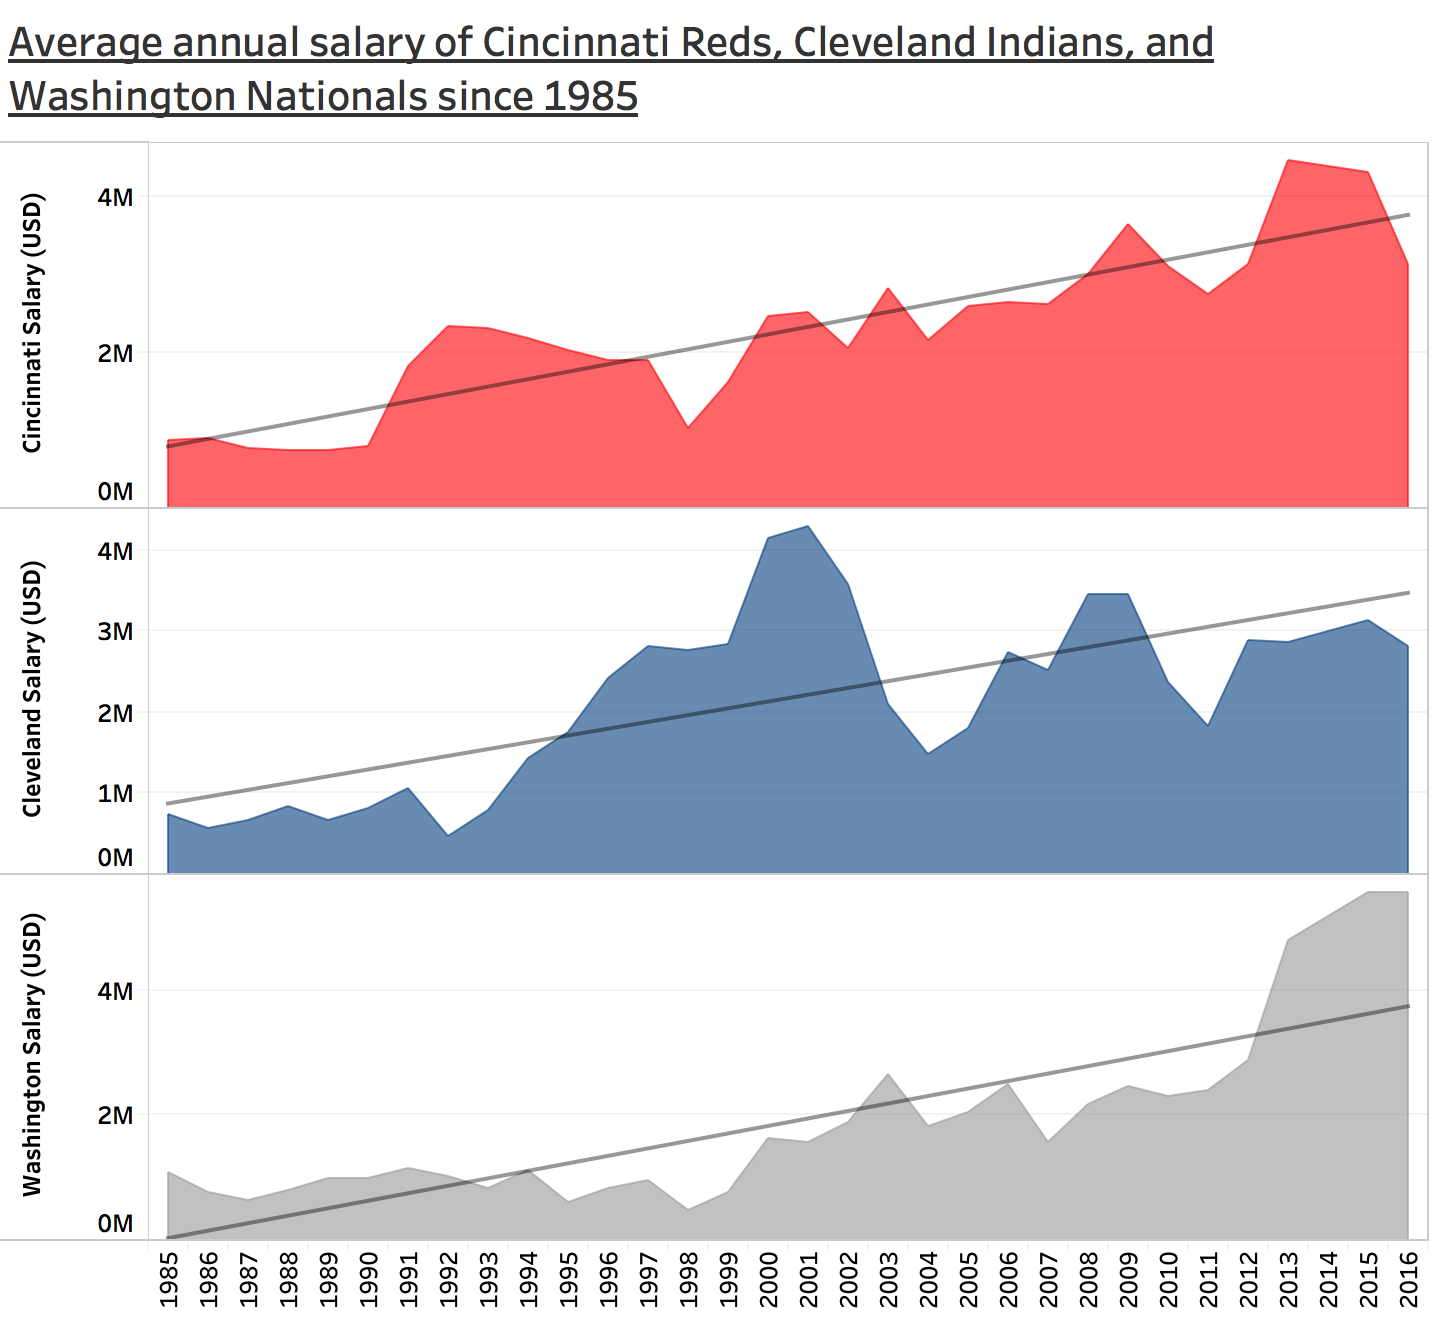

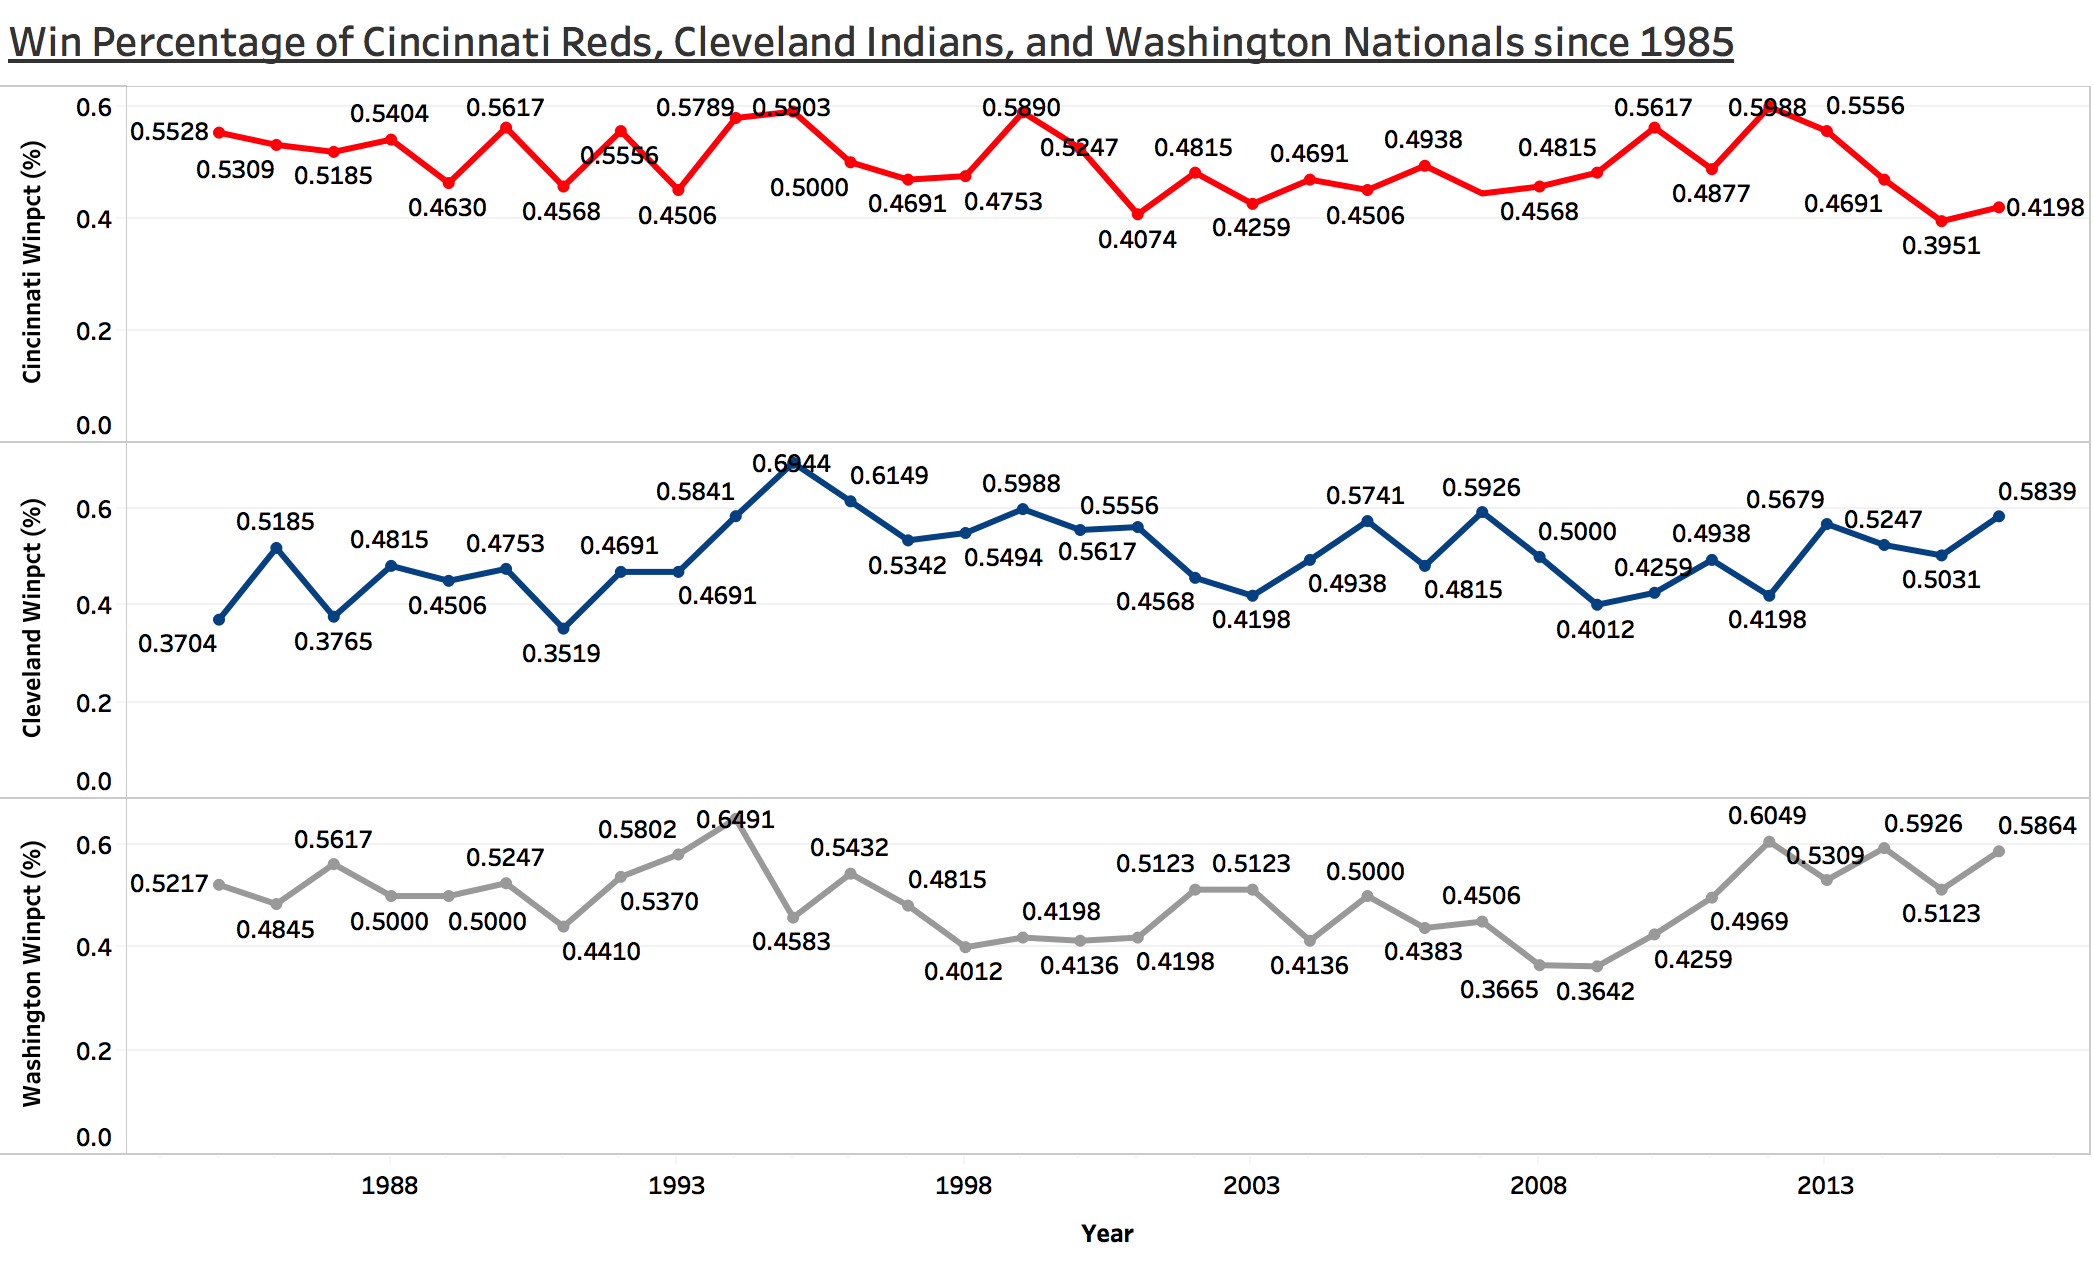

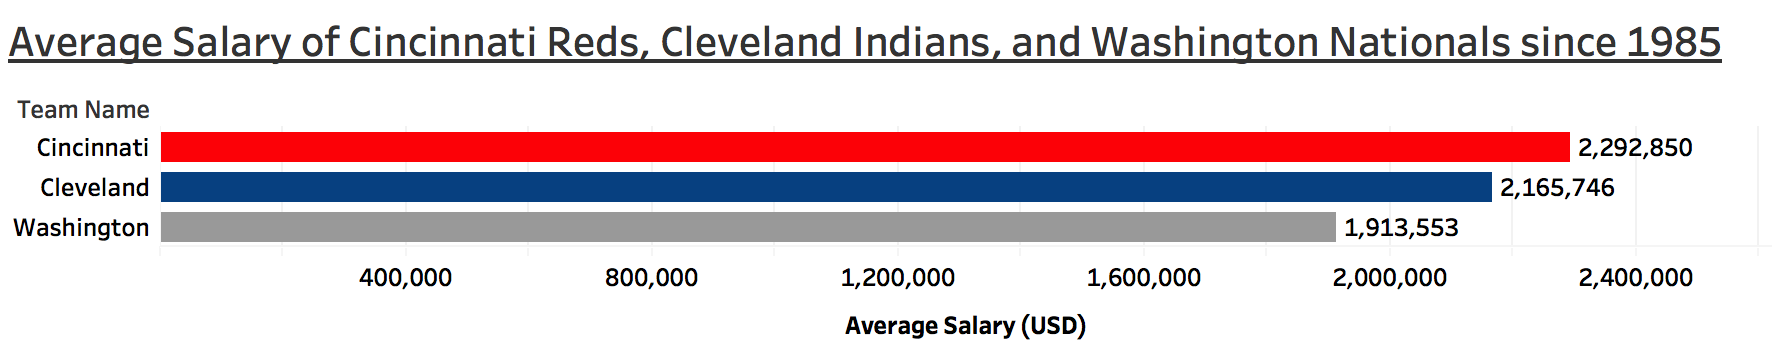

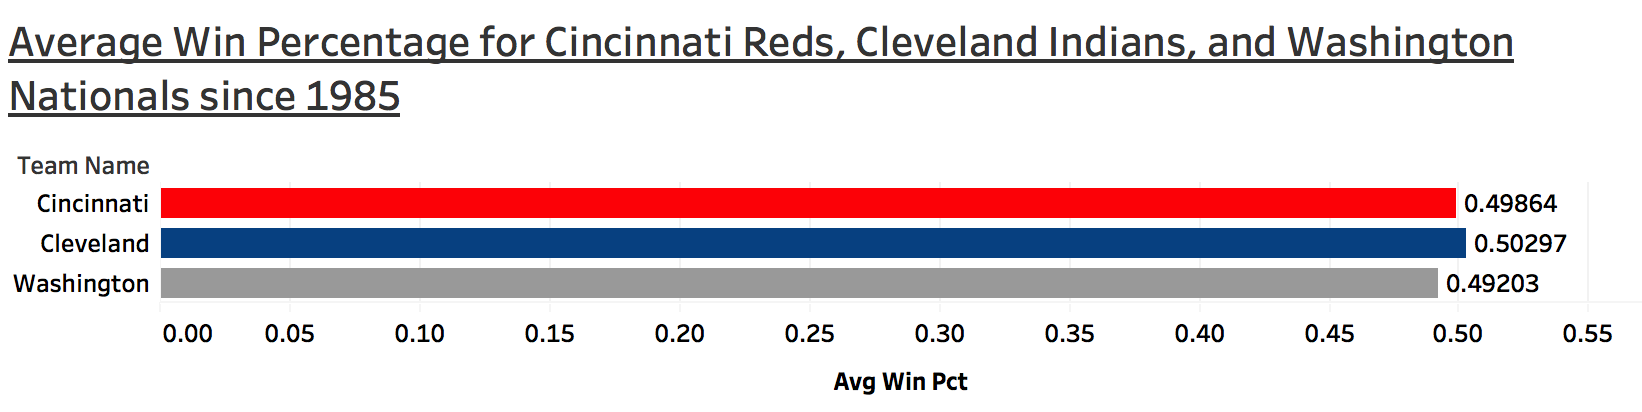

In order to assess the impact of player salaries on win percentage, we plotted win percentage against year, overlaid with information about average salary per team. Salaries were converted to 2017 dollars with the help of the inflation data from Oregon State University.

In [ ]:
redCol = scaleColors(salary.RedsSalary)
cleCol = scaleColors(salary.CleSalary)
wsnCol = scaleColors(salary.WsnSalary)

fit = np.polyfit(salary.RedsSalary, pd.to_numeric(CleWasCinSTATS.CinWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 1)
fit_fn = np.poly1d(fit)
plt.title('Reds Win Percentage vs. Average Salary')
plt.locator_params(axis='x', nbins=5)
plt.plot(salary.RedsSalary, pd.to_numeric(CleWasCinSTATS.CinWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 'yo', salary.RedsSalary, fit_fn(salary.RedsSalary), '--k', color = 'black')
plt.xlabel("Salary")
plt.ylabel("Win Percentage")
plt.show()

fit = np.polyfit(salary.CleSalary, pd.to_numeric(CleWasCinSTATS.CleWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 1)
fit_fn = np.poly1d(fit)
plt.title('Indians Win Percentage vs. Average Salary')
plt.locator_params(axis='x', nbins=5)
plt.plot(salary.CleSalary, pd.to_numeric(CleWasCinSTATS.CleWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 'yo', salary.CleSalary, fit_fn(salary.CleSalary), '--k', color = 'black')
plt.xlabel("Salary")
plt.ylabel("Win Percentage")
plt.show()

fit = np.polyfit(salary.WsnSalary, pd.to_numeric(CleWasCinSTATS.WasWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 1)
fit_fn = np.poly1d(fit)
plt.title('Nationals Win Percentage vs. Average Salary')
plt.locator_params(axis='x', nbins=8)
plt.plot(salary.WsnSalary, pd.to_numeric(CleWasCinSTATS.WasWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 'yo', salary.WsnSalary, fit_fn(salary.WsnSalary), '--k', color = 'black')
plt.xlabel("Salary")
plt.ylabel("Win Percentage")
plt.show()

### Works Cited



“Baseball Rule Change Timeline.” Baseball Almanac, www.baseball-almanac.com/rulechng.shtml.

Albert, Jim. “Sabermetrics: The Past Present and Future.” Mathaware, 12 Feb. 2010, www.mathaware.org/mam/2010/essays/AlbertSabermetrics.pdf. 

Munday, Oliver. “Grantland.” Grantland, 24 July 2015, grantland.com/features/2015-mlb-avm-systems-ken-mauriello-jack-armbruster-moneyball-sabermetrics/. 

Woodruff, Jim. “How Much Money Do Baseball Players Make?” Chron.com, 29 June 2018, work.chron.com/much-money-baseball-players-make-14452.html.

Eye on Baseball staff. Nov 16. “What Is the Best Offensive Stat?” CBSSports.com, 6 Apr. 2017, www.cbssports.com/mlb/news/what-is-the-best-offensive-stat/.

Eye on Baseball staff. Nov 20. “What Is the Best Defensive Stat?” CBSSports.com, 6 Apr. 2017, www.cbssports.com/mlb/news/what-is-the-best-defensive-stat/.

“MLB Stats.” ESPN, ESPN Internet Ventures, www.espn.com/mlb/stats/team/_/stat/fielding.